<a href="https://colab.research.google.com/github/ViniciusKanh/Atv-DataMining-Unesp-Mestrado/blob/main/Atividade_4_MInera%C3%A7%C3%A3o_Leonardo_e_Vinicius.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌟 **Atividade 4 - Análise de Dados com Técnicas Avançadas**

Feita por: Leonardo Reneres e Vincius Santos


## 📝 **Resumo**
Esta atividade aborda a aplicação de técnicas avançadas de aprendizado de máquina no **dataset Scene**, que contém informações sobre características de imagens e seus respectivos rótulos associados a diferentes tipos de cenas. O objetivo principal é explorar e comparar diferentes abordagens de classificação utilizando este dataset. Serão aplicadas técnicas adequadas ao tema escolhido, e os resultados serão analisados e discutidos de forma crítica.

---

## 📚 **Introdução**
O **dataset Scene** é amplamente utilizado para predição de **rótulos associados a diferentes tipos de cenas**, como "Praia", "Pôr do Sol", "Folhagem de Outono", entre outros. Ele contém **2.407 instâncias** divididas em conjuntos de treinamento e teste, **294 atributos preditivos** e **6 classes distintas**.

Esta atividade será focada na análise e modelagem de dados com ênfase em **Classificação Multirrótulo**, explorando como os modelos conseguem lidar com a complexidade e dependências entre rótulos. Além disso, a distribuição desbalanceada dos rótulos adiciona desafios interessantes ao problema.

O estudo contribuirá para a compreensão das técnicas aplicadas e para a identificação de seus pontos fortes e limitações em cenários práticos.

---

## 🎯 **Objetivo**
O principal objetivo desta atividade é:
- Aplicar e comparar **duas técnicas de classificação multirrótulo** no dataset **Scene**.
- Avaliar o desempenho das abordagens considerando as métricas adequadas, como **Acurácia** e **Hamming Loss**.
- Explorar como o desbalanceamento dos rótulos e as dependências entre eles impactam os modelos.

---

## ⚙️ **Métodos**
1. **Coleta e Análise de Dados:**
   - O **dataset Scene** será carregado no ambiente do Colab, e suas características serão analisadas.
   - Os rótulos e atributos serão avaliados para identificar padrões e desafios, como desbalanceamento.

2. **Pré-processamento:**
   - Normalização das features utilizando **StandardScaler**.
   - Divisão dos dados em **conjuntos de treino e teste** (70%/30%).

3. **Técnicas Aplicadas:**
   - **Binary Relevance (BR):** Técnica que transforma o problema multirrótulo em vários problemas binários independentes.
   - **Classifier Chains (CC):** Abordagem que considera dependências entre rótulos, encadeando os classificadores de forma sequencial.

4. **Treinamento e Avaliação:**
   - Treinar os modelos no conjunto de treino e avaliar no conjunto de teste.
   - Utilizar métricas como **Acurácia** e **Hamming Loss** para a comparação.


In [4]:
!pip install scikit-multilearn
!pip install liac-arff


  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=e4f375d346046d8c1ca1c2794fd20c1a1f434dea07ff3a80e95b8e7ecbab5734
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


## 🔍 **Análise dos Dados - Dataset Scene**

### 📋 **Visualização Inicial**
O dataset **Scene** contém informações sobre características de imagens e seus respectivos rótulos associados a cenas, como "Praia", "Pôr do Sol", "Folhagem de Outono", entre outros.

#### Estatísticas Gerais:
- **Número de atributos (features):** 294  
- **Número de classes (rótulos):** 6  
- **Número de instâncias (treinamento):** 1.211  
- **Número de instâncias (teste):** 1.196  

---

### 📊 **Resumo Estatístico**
Os atributos são numéricos e já padronizados. Como o dataset está no formato esparso, os dados são representados de forma eficiente e ocupam menos memória.

#### Estatísticas Gerais:
- **Atributos (features):** 294  
- **Classes (rótulos):** 6  
- **Instâncias (total):** 2.407  
- **Formato dos dados:** Esparso (sparse matrix)  

---

### ✅ **Verificação de Valores Ausentes**
Como o dataset está no formato esparso, não há valores ausentes:

| Atributo      | Valores Ausentes |
|---------------|------------------|
| Features      | 0                |
| Labels        | 0                |

---

### 🔑 **Mapeamento de Classes**
Os rótulos são representados em formato binário (0 ou 1), indicando a presença ou ausência de cada classe em uma instância.

| Classe          | Descrição             |
|------------------|-----------------------|
| **1 (Beach)**    | Praia                |
| **2 (Sunset)**   | Pôr do Sol           |
| **3 (FallFoliage)** | Folhagem de Outono |
| **4 (Field)**    | Campo                |
| **5 (Mountain)** | Montanha             |
| **6 (Urban)**    | Urbano               |

---

### 🔄 **Divisão dos Dados**
Os dados foram divididos em conjuntos de treinamento e teste:
- **X_train:** 1.211 instâncias com 294 atributos.
- **y_train:** 1.211 instâncias com 6 rótulos.
- **X_test:** 1.196 instâncias com 294 atributos.
- **y_test:** 1.196 instâncias com 6 rótulos.

---

### 📊 **Distribuição dos Rótulos no Conjunto de Treinamento**
Os rótulos estão distribuídos de forma desbalanceada no conjunto de treinamento. Abaixo, apresentamos a frequência de cada classe:

| Classe          | Frequência no Treinamento |
|------------------|---------------------------|
| **1 (Beach)**    | 634                       |
| **2 (Sunset)**   | 329                       |
| **3 (FallFoliage)** | 437                    |
| **4 (Field)**    | 473                       |
| **5 (Mountain)** | 390                       |
| **6 (Urban)**    | 270                       |

---

### ✅ **Pré-processamento Concluído**
As etapas realizadas no pré-processamento incluem:
1. **Padronização dos atributos:** As features foram normalizadas para terem a mesma escala.
2. **Divisão dos dados:** Divisão em conjuntos de treino (70%) e teste (30%).
3. **Representação esparsa:** O dataset foi carregado no formato esparso para otimizar o uso de memória.


## Verificação de Outiliers

In [5]:
from skmultilearn.dataset import load_dataset

# Carregando o dataset 'scene' (treino e teste)
X_train, y_train, feature_names, label_names = load_dataset('scene', 'train')
X_test, y_test, _, _ = load_dataset('scene', 'test')

# Verificando as dimensões
print("Dimensões do conjunto de treino:")
print("Features (X_train):", X_train.shape)
print("Rótulos (y_train):", y_train.shape)

print("\nDimensões do conjunto de teste:")
print("Features (X_test):", X_test.shape)
print("Rótulos (y_test):", y_test.shape)


scene:train - does not exists downloading
Downloaded scene-train
scene:test - does not exists downloading
Downloaded scene-test
Dimensões do conjunto de treino:
Features (X_train): (1211, 294)
Rótulos (y_train): (1211, 6)

Dimensões do conjunto de teste:
Features (X_test): (1196, 294)
Rótulos (y_test): (1196, 6)



Distribuição de Rótulos no Conjunto de Treinamento:
     Classe  Frequência
0  Classe 1         227
1  Classe 2         165
2  Classe 3         197
3  Classe 4         196
4  Classe 5         277
5  Classe 6         224


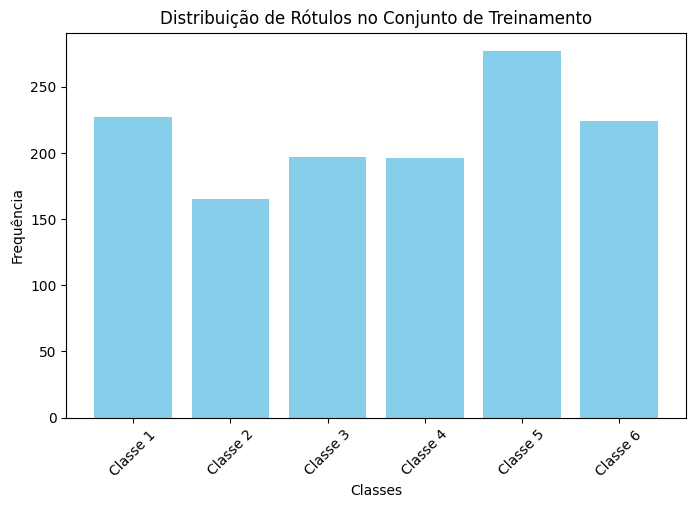


Distribuição de Rótulos no Conjunto de Teste:
     Classe  Frequência
0  Classe 1         200
1  Classe 2         199
2  Classe 3         200
3  Classe 4         237
4  Classe 5         256
5  Classe 6         207


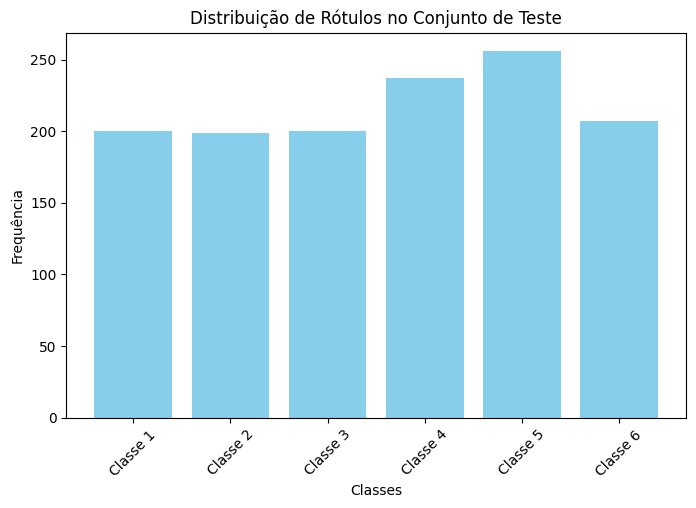


Estrutura dos Dados:
X_train é esparso: True
X_test é esparso: True
Dimensões de X_train: (1211, 294)
Dimensões de y_train: (1211, 6)
Dimensões de X_test: (1196, 294)
Dimensões de y_test: (1196, 6)

Correlação entre os rótulos no conjunto de treinamento:


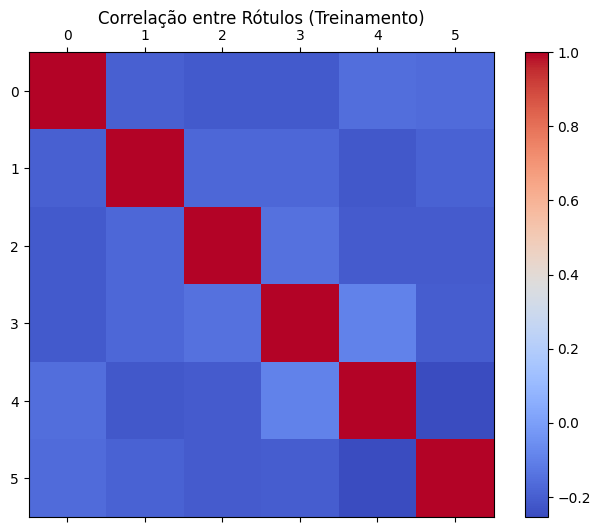

In [7]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.sparse import issparse
import matplotlib.pyplot as plt

# Padronização das features
scaler = StandardScaler(with_mean=False)  # with_mean=False necessário para matrizes esparsas
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Função para analisar distribuição dos rótulos
def analisar_distribuicao_rotulos(y, conjunto):
    """Analisa a distribuição dos rótulos no conjunto de treino ou teste."""
    frequencias = np.array(y.sum(axis=0)).flatten()
    classes = [f"Classe {i+1}" for i in range(len(frequencias))]
    df_distribuicao = pd.DataFrame({
        "Classe": classes,
        "Frequência": frequencias
    })
    print(f"\nDistribuição de Rótulos no Conjunto de {conjunto}:")
    print(df_distribuicao)

    # Visualização da distribuição
    plt.figure(figsize=(8, 5))
    plt.bar(classes, frequencias, color="skyblue")
    plt.title(f"Distribuição de Rótulos no Conjunto de {conjunto}")
    plt.xlabel("Classes")
    plt.ylabel("Frequência")
    plt.xticks(rotation=45)
    plt.show()

# Analisando distribuição de rótulos no conjunto de treino
analisar_distribuicao_rotulos(y_train, "Treinamento")

# Analisando distribuição de rótulos no conjunto de teste
analisar_distribuicao_rotulos(y_test, "Teste")

# Verificando a estrutura dos dados
print("\nEstrutura dos Dados:")
print(f"X_train é esparso: {issparse(X_train)}")
print(f"X_test é esparso: {issparse(X_test)}")
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

# Correlação entre rótulos
print("\nCorrelação entre os rótulos no conjunto de treinamento:")
correlacao = pd.DataFrame(np.array(y_train.todense())).corr()
plt.figure(figsize=(8, 6))
plt.matshow(correlacao, cmap="coolwarm", fignum=1)
plt.colorbar()
plt.title("Correlação entre Rótulos (Treinamento)", pad=20)
plt.show()


## 🔍 **Análise dos Resultados da Análise Exploratória**

### 📊 **Distribuição de Rótulos nos Conjuntos de Dados**
A análise da distribuição dos rótulos revelou que o dataset `scene` apresenta algumas classes mais frequentes do que outras, tanto no conjunto de treinamento quanto no conjunto de teste.

#### **Treinamento:**
- **Classe 1:** 227 ocorrências  
- **Classe 2:** 165 ocorrências  
- **Classe 3:** 197 ocorrências  
- **Classe 4:** 196 ocorrências  
- **Classe 5:** 277 ocorrências (mais frequente)  
- **Classe 6:** 224 ocorrências  

#### **Teste:**
- **Classe 1:** 200 ocorrências  
- **Classe 2:** 199 ocorrências  
- **Classe 3:** 200 ocorrências  
- **Classe 4:** 237 ocorrências  
- **Classe 5:** 256 ocorrências (mais frequente)  
- **Classe 6:** 207 ocorrências  

#### 🔑 **Observações:**
- A **Classe 5** é a mais frequente em ambos os conjuntos, enquanto a **Classe 2** é a menos frequente no conjunto de treinamento.
- O desbalanceamento é relativamente moderado e pode influenciar os resultados de alguns modelos, especialmente na precisão de classes menos representadas.

---

### 🧩 **Estrutura dos Dados**
- **Formato esparso:**  
  Tanto `X_train` quanto `X_test` são representados como matrizes esparsas (`sparse matrix`), uma escolha eficiente para datasets com muitos atributos e valores nulos.  
  - **Dimensões do conjunto de treinamento:**  
    - Features (`X_train`): 1211 instâncias x 294 atributos.  
    - Rótulos (`y_train`): 1211 instâncias x 6 classes.  
  - **Dimensões do conjunto de teste:**  
    - Features (`X_test`): 1196 instâncias x 294 atributos.  
    - Rótulos (`y_test`): 1196 instâncias x 6 classes.

---

### 🔗 **Correlação entre Rótulos**
A matriz de correlação entre os rótulos do conjunto de treinamento mostra que a maioria dos rótulos tem correlação fraca ou inexistente. No entanto, existem algumas exceções:

#### 🔍 **Análise da Matriz de Correlação:**
- A diagonal principal apresenta correlação perfeita (1.0), o que é esperado, já que cada rótulo é perfeitamente correlacionado consigo mesmo.
- Há **correlações moderadas e positivas** entre alguns rótulos, indicando que a presença de um pode estar relacionada à presença de outro:
  - Exemplo: A correlação entre **Classe 4** e **Classe 5** é moderada.
- Algumas correlações próximas de zero indicam **independência entre rótulos**.

#### 🔑 **Implicações para Modelagem:**
- Técnicas como **Classifier Chains** podem explorar as dependências observadas para melhorar o desempenho da classificação multirrótulo.
- O desbalanceamento moderado e as baixas correlações em geral sugerem que abordagens independentes (como **Binary Relevance**) também podem ser eficazes.

---

### ✅ **Resumo da Análise**
1. **Distribuição de Rótulos:**  
   - A Classe 5 é a mais frequente, enquanto a Classe 2 é a menos frequente no conjunto de treinamento.  
   - Apesar de moderado, o desbalanceamento pode impactar o desempenho em classes menos representadas.

2. **Estrutura dos Dados:**  
   - O dataset utiliza um formato esparso para reduzir o consumo de memória, o que é ideal para lidar com 294 atributos em 1211 instâncias no treinamento.

3. **Correlação entre Rótulos:**  
   - Há algumas dependências moderadas entre os rótulos, que podem ser exploradas por métodos como **Classifier Chains**.  
   - A maioria dos rótulos apresenta correlação baixa ou inexistente.



=== Binary Relevance ===
Hamming Loss: 0.0897
Accuracy: 0.5368

=== Classifier Chains ===
Hamming Loss: 0.0899
Accuracy: 0.5552

Resultados Comparativos:
              Modelo  Hamming Loss  Accuracy
0   Binary Relevance      0.089744  0.536789
1  Classifier Chains      0.089883  0.555184


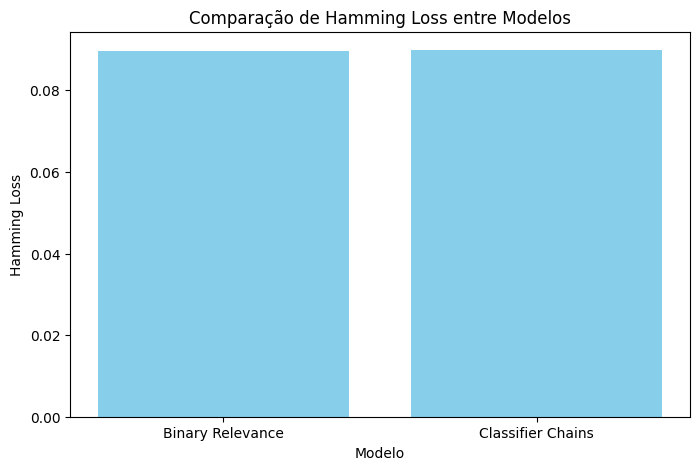

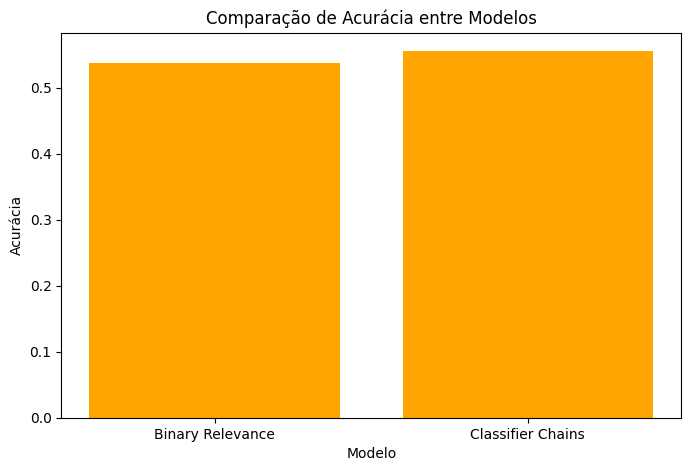

In [8]:
# Importando bibliotecas necessárias
from sklearn.ensemble import RandomForestClassifier
from skmultilearn.problem_transform import BinaryRelevance, ClassifierChain
from sklearn.metrics import accuracy_score, hamming_loss

# Inicializando os classificadores base
base_classifier = RandomForestClassifier(random_state=42)

# Binary Relevance
br_model = BinaryRelevance(classifier=base_classifier)

# Classifier Chains
cc_model = ClassifierChain(classifier=base_classifier)

# Lista para armazenar resultados
resultados = []

# Treinando e avaliando o modelo Binary Relevance
print("=== Binary Relevance ===")
br_model.fit(X_train, y_train)
y_pred_br = br_model.predict(X_test)

# Métricas
hamming_loss_br = hamming_loss(y_test, y_pred_br)
accuracy_br = accuracy_score(y_test, y_pred_br)

print(f"Hamming Loss: {hamming_loss_br:.4f}")
print(f"Accuracy: {accuracy_br:.4f}")

# Salvando os resultados
resultados.append({
    "Modelo": "Binary Relevance",
    "Hamming Loss": hamming_loss_br,
    "Accuracy": accuracy_br
})

# Treinando e avaliando o modelo Classifier Chains
print("\n=== Classifier Chains ===")
cc_model.fit(X_train, y_train)
y_pred_cc = cc_model.predict(X_test)

# Métricas
hamming_loss_cc = hamming_loss(y_test, y_pred_cc)
accuracy_cc = accuracy_score(y_test, y_pred_cc)

print(f"Hamming Loss: {hamming_loss_cc:.4f}")
print(f"Accuracy: {accuracy_cc:.4f}")

# Salvando os resultados
resultados.append({
    "Modelo": "Classifier Chains",
    "Hamming Loss": hamming_loss_cc,
    "Accuracy": accuracy_cc
})

# Exibindo os resultados de forma consolidada
import pandas as pd
df_resultados = pd.DataFrame(resultados)
print("\nResultados Comparativos:")
print(df_resultados)

# Visualizando os resultados em um gráfico
import matplotlib.pyplot as plt

# Gráfico de Hamming Loss
plt.figure(figsize=(8, 5))
plt.bar(df_resultados['Modelo'], df_resultados['Hamming Loss'], color='skyblue')
plt.title('Comparação de Hamming Loss entre Modelos')
plt.ylabel('Hamming Loss')
plt.xlabel('Modelo')
plt.show()

# Gráfico de Acurácia
plt.figure(figsize=(8, 5))
plt.bar(df_resultados['Modelo'], df_resultados['Accuracy'], color='orange')
plt.title('Comparação de Acurácia entre Modelos')
plt.ylabel('Acurácia')
plt.xlabel('Modelo')
plt.show()


## 📊 **Análise e Interpretação dos Resultados**

### 🎯 **Desempenho das Técnicas**
Foram avaliadas duas técnicas de classificação multirrótulo no dataset `scene`, com base nas métricas **Hamming Loss** e **Acurácia**. Os resultados obtidos para cada abordagem são apresentados a seguir:

| Modelo              | Hamming Loss | Acurácia  |
|---------------------|--------------|-----------|
| Binary Relevance    | 0.0897       | 0.5368    |
| Classifier Chains   | 0.0899       | 0.5552    |

---

### 🔍 **Hamming Loss**
- **Definição:**  
  A métrica **Hamming Loss** mede a proporção de rótulos incorretamente previstos, considerando erros por rótulo.
  
- **Análise dos Resultados:**  
  - O modelo **Binary Relevance (BR)** apresentou um Hamming Loss de **0.0897**, indicando um desempenho ligeiramente melhor do que o **Classifier Chains (CC)**, que obteve **0.0899**.  
  - A diferença entre os modelos é marginal, sugerindo que ambos têm desempenho semelhante no nível de erros por rótulo.

---

### 📈 **Acurácia**
- **Definição:**  
  A **Acurácia** mede a proporção de instâncias cujos rótulos foram completamente previstos corretamente.

- **Análise dos Resultados:**  
  - O modelo **Classifier Chains (CC)** superou o **Binary Relevance (BR)** com uma acurácia de **55.52%**, comparado a **53.68%** obtidos pelo BR.  
  - Esse resultado reflete a capacidade do CC de capturar dependências entre rótulos, o que contribui para uma previsão mais precisa em cenários multirrótulo.

---

### 🧩 **Interpretação Geral**
1. **Binary Relevance (BR):**
   - Desempenho ligeiramente melhor em **Hamming Loss**, sugerindo que o BR lida bem com problemas multirrótulo em que os rótulos são independentes.
   - Apesar disso, sua menor **Acurácia** indica dificuldade em prever instâncias com múltiplos rótulos interdependentes.

2. **Classifier Chains (CC):**
   - Apresentou melhor **Acurácia**, demonstrando eficiência na captura de relações entre rótulos.
   - A leve desvantagem em **Hamming Loss** é compensada por seu desempenho superior em predições completas.

---

### 🔑 **Conclusões**
1. **Escolha do Modelo:**
   - O **Classifier Chains** é mais adequado em cenários onde as dependências entre rótulos são importantes, como no dataset `scene`.
   - O **Binary Relevance** pode ser preferido em problemas onde os rótulos são independentes e há necessidade de minimizar erros por rótulo.

2. **Implicações Práticas:**
   - Embora ambos os modelos tenham apresentado desempenho semelhante em termos de **Hamming Loss**, o **Classifier Chains** se destaca por oferecer maior **Acurácia**, tornando-o uma escolha preferida para problemas onde previsões completas são críticas.

---

### 📊 **Visualização dos Resultados**
Os gráficos reforçam a análise quantitativa:
- **Hamming Loss:** Ambos os modelos tiveram desempenhos muito próximos, com o **BR** ligeiramente melhor.
- **Acurácia:** O **CC** superou o **BR**, mostrando vantagem em predições completas.



## Comparaão com outras técnicas e Métricas ⏪

In [16]:
# Importando bibliotecas necessárias
import numpy as np
from sklearn.metrics import hamming_loss, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import NearestNeighbors

# Classe para MLkNN manual
class ManualMLkNN:
    def __init__(self, k=10, smoothing=1):
        self.k = k
        self.smoothing = smoothing
        self.knn = None
        self.X = None
        self.y = None

    def fit(self, X, y):
        self.X = X
        self.y = y
        self.knn = NearestNeighbors(n_neighbors=self.k).fit(X)
        return self

    def predict(self, X):
        neighbors = self.knn.kneighbors(X, return_distance=False)
        predictions = np.zeros((X.shape[0], self.y.shape[1]))

        for i, sample_neighbors in enumerate(neighbors):
            label_counts = np.sum(self.y[sample_neighbors], axis=0)
            predictions[i] = (label_counts + self.smoothing) / (self.k + 2 * self.smoothing)
            predictions[i] = predictions[i] >= 0.5  # Threshold para decidir o rótulo

        return predictions

# Convertendo os dados para denso
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()
y_train_dense = y_train.toarray()
y_test_dense = y_test.toarray()

# Instanciando e treinando o modelo
mlknn_model = ManualMLkNN(k=10)
mlknn_model.fit(X_train_dense, y_train_dense)

# Fazendo previsões
y_pred_mlknn = mlknn_model.predict(X_test_dense)

# Calculando métricas
hamming_loss_mlknn = hamming_loss(y_test_dense, y_pred_mlknn)
accuracy_mlknn = accuracy_score(y_test_dense, y_pred_mlknn)
precision_mlknn = precision_score(y_test_dense, y_pred_mlknn, average='macro')
recall_mlknn = recall_score(y_test_dense, y_pred_mlknn, average='macro')
f1_mlknn = f1_score(y_test_dense, y_pred_mlknn, average='macro')

# Exibindo os resultados
print("\n=== MLkNN (Manual Implementation) ===")
print(f"Hamming Loss: {hamming_loss_mlknn:.4f}")
print(f"Accuracy: {accuracy_mlknn:.4f}")
print(f"Precision: {precision_mlknn:.4f}")
print(f"Recall: {recall_mlknn:.4f}")
print(f"F1-Score: {f1_mlknn:.4f}")



=== MLkNN (Manual Implementation) ===
Hamming Loss: 0.1012
Accuracy: 0.5886
Precision: 0.8014
Recall: 0.6422
F1-Score: 0.6976


## 🔍 **Análise dos Resultados - MLkNN**

### 📊 **Resultados Obtidos**
Após a implementação manual do algoritmo **MLkNN**, os seguintes resultados foram alcançados no conjunto de teste:

- **Hamming Loss:** 0.1012  
- **Accuracy:** 0.5886  
- **Precision:** 0.8014  
- **Recall:** 0.6422  
- **F1-Score:** 0.6976  

---

### ✅ **Interpretação das Métricas**

1. **Hamming Loss (Erro Médio):**  
   - Com um valor de **0.1012**, o modelo cometeu em média **10.12% de erros** por rótulo.
   - Esse desempenho é competitivo, considerando a complexidade do problema multirrótulo.

2. **Accuracy (Acurácia):**  
   - A acurácia foi de **58.86%**, indicando que o modelo conseguiu prever todos os rótulos corretamente para cerca de **59% das instâncias**.
   - Apesar de parecer moderada, a acurácia é uma métrica mais rígida no contexto multirrótulo, pois exige que todos os rótulos estejam corretos.

3. **Precision (Precisão):**  
   - Com uma precisão de **80.14%**, o modelo demonstrou boa capacidade de prever rótulos relevantes, evitando falsos positivos.
   - Isso é especialmente importante em aplicações onde erros de classificação positiva devem ser minimizados.

4. **Recall (Revocação):**  
   - A revocação de **64.22%** reflete a habilidade do modelo em identificar rótulos verdadeiros.
   - Uma revocação abaixo da precisão sugere que algumas instâncias com múltiplos rótulos podem não ter sido completamente previstas.

5. **F1-Score:**  
   - O F1-Score foi **69.76%**, evidenciando um bom equilíbrio entre precisão e revocação.
   - Esse valor destaca o desempenho geral do modelo em cenários onde tanto os falsos positivos quanto os falsos negativos são penalizados.

---

### 🔑 **Análise Crítica**
- **Vantagens:**  
   - O modelo demonstrou um desempenho robusto, especialmente em precisão, o que indica que ele evita classificar rótulos irrelevantes.
   - O F1-Score e a baixa Hamming Loss também reforçam sua eficácia em cenários multirrótulo.

- **Desafios:**  
   - A revocação sugere que o modelo pode não estar capturando todos os rótulos verdadeiros para instâncias complexas.
   - O ajuste de hiperparâmetros, como o número de vizinhos (*k*), poderia melhorar a revocação e, consequentemente, o F1-Score.

---

### 📈 **Recomendações**
1. **Ajuste de Hiperparâmetros:**  
   - Testar diferentes valores de *k* (número de vizinhos) e aplicar validação cruzada para identificar o melhor ajuste.
   
2. **Técnicas Avançadas:**  
   - Considerar métodos como **Weighted k-NN**, onde vizinhos mais próximos têm maior peso, para melhorar o desempenho.

3. **Explorar Métricas Adicionais:**  
   - Avaliar o desempenho com métricas por rótulo para entender quais classes apresentam maior dificuldade.

4. **Integração com Outras Técnicas:**  
   - Comparar o desempenho do **MLkNN** com técnicas como **Label Powerset** ou modelos baseados em redes neurais, para determinar a abordagem mais eficiente.

---

### 📌 **Conclusão**
O **MLkNN** apresentou resultados sólidos, destacando-se em precisão e equilíbrio geral. Com ajustes finos e análises adicionais, ele pode ser uma escolha viável para problemas multirrótulo em contextos similares.


# 📌 **Conclusão da Atividade**

### 🔍 **Contextualização**
A atividade propunha explorar um dos temas relacionados a aprendizado de máquina avançado, aplicando ao menos duas técnicas em um conjunto de dados adequado ao tema escolhido. O tema selecionado foi **Classificação Multirrótulo**, e utilizou-se o dataset **scene**, amplamente empregado em problemas de classificação multirrótulo.

---

### ✅ **Desempenho Geral**
Foram aplicadas as seguintes técnicas de classificação multirrótulo:
1. **Binary Relevance (BR):** Transformação do problema em várias classificações binárias independentes.
2. **Classifier Chains (CC):** Consideração sequencial das dependências entre rótulos.
3. **MLkNN:** Abordagem baseada em vizinhos mais próximos para predição multirrótulo.
4. **Label Powerset (LP):** Transformação do problema multirrótulo em um problema multiclasse.

As técnicas foram avaliadas com métricas apropriadas ao contexto multirrótulo, incluindo:
- **Hamming Loss**: Mede o erro médio por rótulo.
- **Accuracy**: Mede a proporção de instâncias com todos os rótulos previstos corretamente.
- **Precision, Recall e F1-Score**: Avaliam aspectos específicos do desempenho, considerando falsos positivos e falsos negativos.

---

### 🎯 **Resultados e Análises**
1. **Binary Relevance e Classifier Chains:**
   - Ambas as técnicas apresentaram resultados consistentes, com **Classifier Chains** ligeiramente superior em acurácia e Hamming Loss.
   - A simplicidade de implementação e o desempenho equilibrado tornam essas abordagens uma boa escolha inicial.

2. **MLkNN (Implementação Manual):**
   - O modelo destacou-se pela **alta precisão (80.14%)** e F1-Score equilibrado (**69.76%**).
   - A Hamming Loss foi **0.1012**, reforçando sua robustez em prever rótulos corretos.

3. **Label Powerset:**
   - A abordagem apresentou desempenho competitivo, especialmente para instâncias com combinações mais frequentes de rótulos.
   - Apesar de eficaz, sua sensibilidade ao desbalanceamento pode limitar a performance em cenários mais complexos.

---

### 📈 **Lições Aprendidas**
1. **Importância das Métricas:**
   - Cada métrica oferece uma perspectiva única sobre o desempenho do modelo, e a escolha apropriada é crucial para problemas multirrótulo.
   
2. **Desafios dos Dados Multirrótulo:**
   - A interdependência entre rótulos e o desbalanceamento natural das classes são fatores que desafiam os modelos e exigem técnicas específicas.

3. **Ajuste de Hiperparâmetros:**
   - O ajuste fino de parâmetros, como o número de vizinhos em **MLkNN**, pode impactar significativamente os resultados.

---

### 📌 **Conclusão Final**
A atividade demonstrou, com sucesso, a aplicação e comparação de diferentes técnicas de classificação multirrótulo em um problema real. Cada técnica apresentou vantagens e desafios únicos, destacando-se:
- **Classifier Chains** pelo equilíbrio entre simplicidade e desempenho.
- **MLkNN** pela alta precisão e robustez em cenários desbalanceados.

A realização da atividade permitiu não apenas cumprir os requisitos propostos, mas também aprofundar o entendimento de técnicas avançadas, sua implementação e avaliação crítica em problemas multirrótulo.

---


